In [1]:
# Check Kernel is generating ouput.
24

24

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# Importing the dataset
dataset = pd.read_csv('test_data.csv')

In [83]:
dataset.head()

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [84]:
dataset.drop(['tweet_id', 'name', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [85]:
dataset.head()

,sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [86]:
dataset = dataset.rename(columns={'text': 'Tweets'})

In [87]:
dataset = dataset[['Tweets','sentiment',]]

In [88]:
dataset.head()

,Tweets,sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experienc...,positive
2,I didn't today... Must mean I need to take ano...,neutral
3,"it's really aggressive to blast obnoxious ""ent...",negative
4,and it's a really big bad thing about it,negative


In [89]:
# UNIQUE VALUES in all columns:
print(dataset.apply(lambda col: col.nunique()))

Tweets       14314
sentiment        3
dtype: int64


In [90]:
# VALUE COUNT:
dataset['sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [91]:
dataset.sentiment.nunique(dropna = True)

3

In [92]:
dataset.columns

Index(['Tweets', 'sentiment'], dtype='object')

In [93]:
# Label Encoding
dataset['sentiment'].replace(['negative', 'neutral', 'positive'], [0, 1, 2], inplace = True)

In [94]:
dataset.tail()

,Tweets,sentiment
14635,thank you we got on a different flight to Chic...,2
14636,leaving over 20 minutes Late Flight. No warnin...,0
14637,Please bring American Airlines to #BlackBerry10,1
14638,"you have my money, you change my flight, and d...",0
14639,we have 8 ppl so we need 2 know how many seats...,1


In [100]:
dataset[dataset.isnull().any(axis=1)]

,Tweets,sentiment


In [53]:
# dataset = dataset.sample(frac = 0.20)

In [54]:
dataset.shape

(2928, 2)

In [103]:
dataset = dataset.iloc[0:2000, 0:]

In [104]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()

# program body starts
corpus = []
for i in range(0, 2000):
    tweets = re.sub('[a-zA-Z0-9]+', '', dataset['Tweets'][i])
    tweets = re.sub('#', '', dataset['Tweets'][i])
    tweets = re.sub(r'@+', '', dataset['Tweets'][i])
    tweets = re.sub('RT[\s]', '', dataset['Tweets'][i])
    tweets = re.sub('https?:\/\/', '', dataset['Tweets'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    ps = PorterStemmer()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    corpus.append(tweets)
# program body ends

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 30.349846363067627


In [196]:
dataset.head(10)

,Tweets,sentiment
0,What @dhepburn said.,1
1,plus you've added commercials to the experienc...,2
2,I didn't today... Must mean I need to take ano...,1
3,"it's really aggressive to blast obnoxious ""ent...",0
4,and it's a really big bad thing about it,0
5,seriously would pay $30 a flight for seats tha...,0
6,"yes, nearly every time I fly VX this __ar worm...",2
7,Really missed a prime opportunity for Men With...,1
8,"Well, I didn't_but NOW I DO! :-D",2
9,"it was amazing, and arrived an hour early. You...",2


In [203]:
corpus

['@dhepburn said.',
 'plu ad commerci experience... tacky.',
 'today... must mean need take anoth trip!',
 'realli aggress blast obnoxi "entertainment" guests\' face &amp; littl recours',
 'realli big bad thing',
 'serious would pay $30 flight seat playing. realli bad thing fli va',
 'yes, nearli everi time fli vx __ar worm_ won__ go away :)',
 'realli miss prime opportun men without hat parody, there. t.co/mwpg7grezp',
 "well, didn't_but do! :-d",
 'amazing, arriv hour early. good me.',
 'know suicid second lead caus death among teen 10-24',
 '&lt;3 pretti graphics. much better minim iconography. :d',
 'great deal! alreadi think 2nd trip @australia &amp; even gone 1st trip yet! ;p',
 "@virginmedia i'm fli #fabul #seduct sky again! u take #stress away travel t.co/ahlxhhkiyn",
 'thanks!',
 'sfo-pdx schedul still mia.',
 "excit first cross countri flight lax mco i'v heard noth great thing virgin america. #29daystogo",
 'flew nyc sfo last week fulli sit seat due two larg gentleman either 

In [112]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [113]:
X.shape

(2000, 1500)

In [114]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y.shape

(2000,)

In [116]:
pd.DataFrame(y)

,0
0,1
1,2
2,1
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,2


In [117]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [118]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [119]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [121]:
cm

array([[187,  33,  31],
       [ 30,  21,  23],
       [ 39,   6,  30]], dtype=int64)

In [183]:
A = pd.DataFrame(cm[0:1, :1])
B = pd.DataFrame(cm[1:2, 1:2])
C = pd.DataFrame(cm[2:3, 2:3])
cm_sum = np.sum(cm)
cf_sum = A + B + C
print("Accuracy: ", (cf_sum / cm_sum) * 100)

Accuracy:        0
0  59.5


In [122]:
cm_df = pd.DataFrame(cm, index = ['0','1','2'], columns = ['0','1','2'])

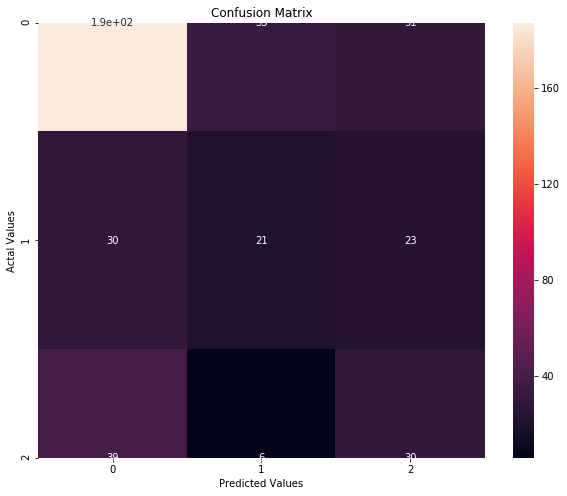

In [125]:
import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [179]:
from sklearn.naive_bayes import MultinomialNB
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train, y_train)

MultinomialNB()

In [180]:
# Predicting the Test set results
y_pred = classifier_MNB.predict(X_test)

In [181]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_MNNB = confusion_matrix(y_test, y_pred)

In [182]:
cm_MNNB

array([[221,  22,   8],
       [ 34,  27,  13],
       [ 30,  11,  34]], dtype=int64)

In [185]:
A_MNNB = pd.DataFrame(cm_MNNB[0:1, :1])
B_MNNB = pd.DataFrame(cm_MNNB[1:2, 1:2])
C_MNNB = pd.DataFrame(cm_MNNB[2:3, 2:3])
cm_sum_MNNB = np.sum(cm_MNNB)
cf_sum_MNNB = A_MNNB + B_MNNB + C_MNNB
print("Accuracy: ", (cf_sum_MNNB / cm_sum_MNNB) * 100)

Accuracy:        0
0  70.5
